# Lab 5: High School Students Data Mining

In [89]:
# Import Statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

# 1: Statistic Tasks

Load student-mat.csv and separate the values by ';'

Load student-mat.csv and student-por.csv into a pandas data frame

# 1.1: Student-mat CSV Dataset

In [4]:
mat_df = pd.read_csv('student-mat.csv', sep = ';')
mat_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


There are 395 rows and 33 columns in this file

Next, list the categorical and numeric features

In [14]:
numeric_features = mat_df.select_dtypes(include=['int64', 'float64']).columns
numeric_features


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [15]:
categorical_features = mat_df.select_dtypes(include=['object', 'category']).columns
categorical_features


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

We can see that there are several different categories based on numeric features versus categorical features, with the amount being almost an even split between the two. But, with numeric having 16 features and categorical features having 17 features.

# 1.2: Student-por CSV Dataset

In [6]:
por_df = pd.read_csv('student-por.csv', sep = ';')
por_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


There are 649 rows with 33 columns in this file, this file has almost double the amount of rows compared to the studetn-mat CSF file

Next, list the categorical and numerical features

In [16]:
numeric_features = por_df.select_dtypes(include=['int64', 'float64']).columns
numeric_features


Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [17]:
categorical_features = por_df.select_dtypes(include=['object', 'category']).columns
categorical_features

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

Just like the student-mat file, there are 16 numerical features and 17 categorical features with the same columns or data. 

# 1.3: Using a heatmap for both CSV files, identify the three features that have the greatest impact on a students grades (G1, G2, G3)

Use only numeric values to create a heatmap for the student-mat file

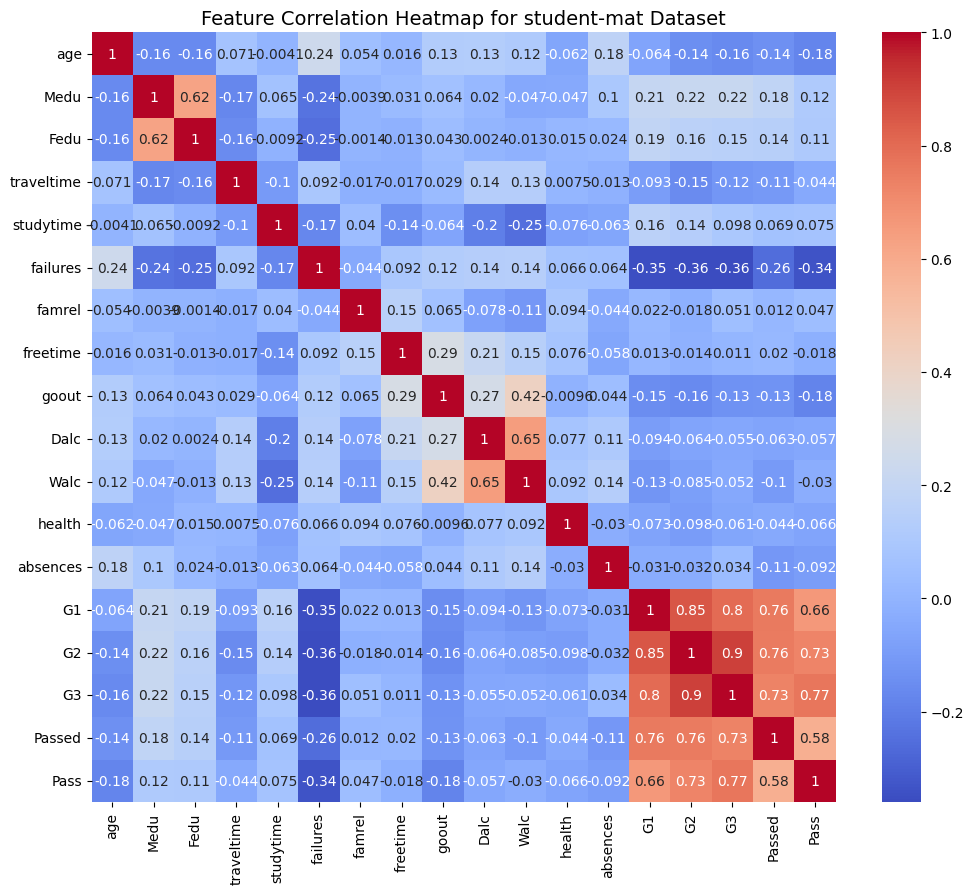

<Figure size 640x480 with 0 Axes>

In [93]:
mat_corr = mat_df.iloc[:, :].corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(mat_corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap for student-mat Dataset", fontsize=14)
plt.show()
plt.savefig('Heatmap_Correlation_math.png')

In [36]:
g1 = mat_corr["G1"].drop("G1")
print(g1.sort_values(ascending=False).head(5))

G2           0.852118
G3           0.801468
Medu         0.205341
Fedu         0.190270
studytime    0.160612
Name: G1, dtype: float64


The top 3 features that affect G1 besides G2 and G3 are mothers education (Medu), and fathers education(Fedu), and study time 

In [39]:
g2 = mat_corr["G2"].drop("G2")
print(g1.sort_values(ascending=False).head(5))

G2           0.852118
G3           0.801468
Medu         0.205341
Fedu         0.190270
studytime    0.160612
Name: G1, dtype: float64


Just like G1, the same three features are present in the correlation matrix

In [40]:
g3 = mat_corr["G3"].drop("G3")
print(g1.sort_values(ascending=False).head(5))

G2           0.852118
G3           0.801468
Medu         0.205341
Fedu         0.190270
studytime    0.160612
Name: G1, dtype: float64


Exactly like G1 and G2, G3 is also impacted the most by the mother's education, father's education, and study time. 

Use only numeric values to create a heatmap for the student-por file

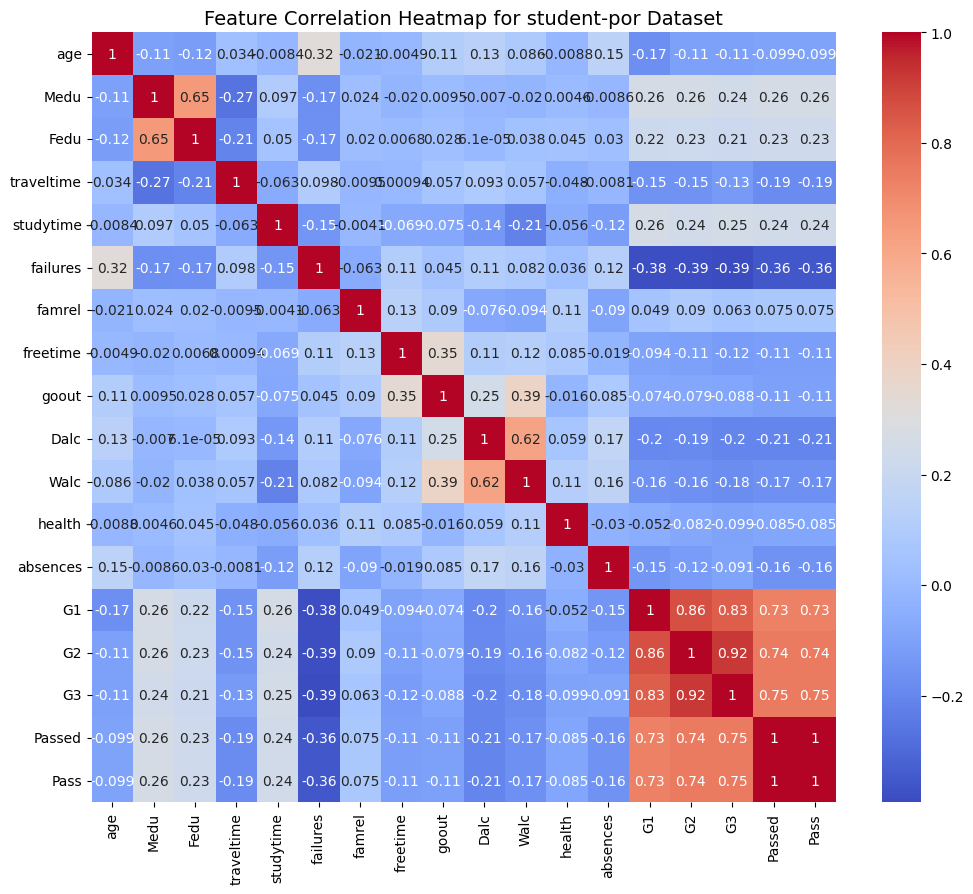

<Figure size 640x480 with 0 Axes>

In [94]:
por_corr = por_df.iloc[:, :].corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(por_corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap for student-por Dataset", fontsize=14)
plt.show()
plt.savefig('Heatmap_Correlation_port.png')

In [43]:
g1 = por_corr["G1"].drop("G1")
print(g1.sort_values(ascending=False).head(5))

G2           0.864982
G3           0.826387
studytime    0.260875
Medu         0.260472
Fedu         0.217501
Name: G1, dtype: float64


In [44]:
g2 = por_corr["G2"].drop("G2")
print(g1.sort_values(ascending=False).head(5))

G2           0.864982
G3           0.826387
studytime    0.260875
Medu         0.260472
Fedu         0.217501
Name: G1, dtype: float64


In [45]:
g3 = por_corr["G3"].drop("G3")
print(g1.sort_values(ascending=False).head(5))

G2           0.864982
G3           0.826387
studytime    0.260875
Medu         0.260472
Fedu         0.217501
Name: G1, dtype: float64


Unlike the math student file, the Portuguese file has the same features that impact the grades the most, but in a different order. Compared to math, the mother's education was the biggest impact on all the grades. But in Portuguese, the study time has the biggest impact on all the grades

# 1.4: Using a bar plot, select any four attributes of our choice and use appropriate statistical results to represent them

In [64]:
# Select the four attributes
attributes = ["freetime", "goout", "Dalc", "Walc"]

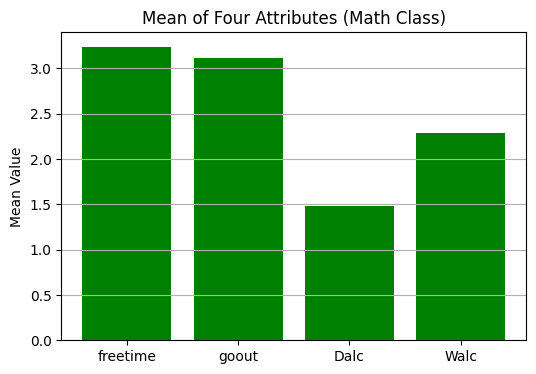

<Figure size 640x480 with 0 Axes>

In [95]:
# Compute mean of each attribute
mat_means = mat_df[attributes].mean()

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(mat_means.index, mat_means.values, color="green")
plt.title("Mean of Four Attributes (Math Class)")
plt.ylabel("Mean Value")
plt.grid(axis = 'y')
plt.show()
plt.savefig('Bar_plot_math.png')

Above is a bar graph that shows the mean of free time from a scale of 1-5, the mean of going out from a scale of 1-5, the workday alcohol consumption on a scale from 1-5, and the weekend alcohol consumption from a scale of 1-5. I chose these four attributes because they were all measured the same way with a scale of 1-5, with 1 being very low and 5 being very high. I also chose these four attributes because if we refer back to the heatmap for a correlation between features and grades, these four attributes were some of the lowest correlation values to their overall grade.

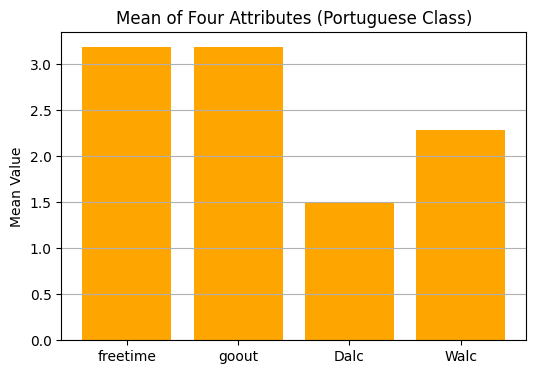

<Figure size 640x480 with 0 Axes>

In [96]:
# Compute mean of each attribute
por_means = por_df[attributes].mean()

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(por_means.index, por_means.values, color="orange")
plt.title("Mean of Four Attributes (Portuguese Class)")
plt.ylabel("Mean Value")
plt.grid(axis = 'y')
plt.show()
plt.savefig('Bar_plot_port.png')

Using the same four attributes on the Portuguese class, the means of these features are very similar to the Math class, with slightly higher going-out average. But just like the Math class, these four attributes have very little/low correlation with the grades in the class. The main purpose of these bar charts is to demonstrate that these have pretty high averages but do not have any correlation or have very little correlation to a persons grades.

# 1.4: Using a line plot, select four attributes of our choice and use appropriate statistical results to represent them

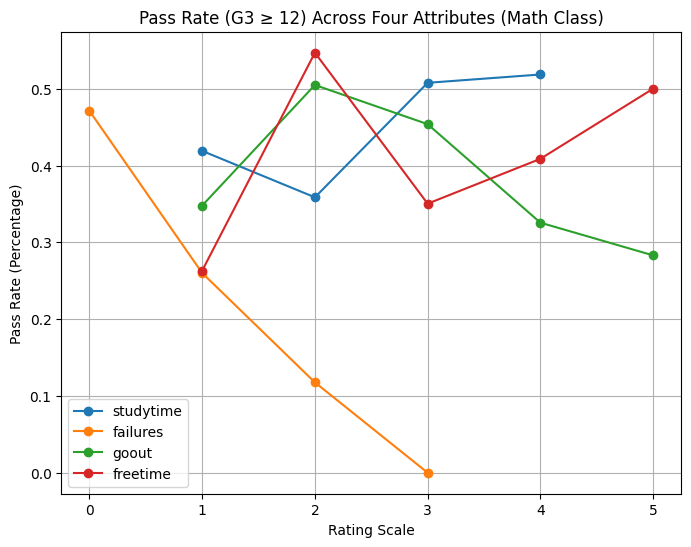

<Figure size 640x480 with 0 Axes>

In [97]:
# create a new column to see if the student passed the class
mat_df["Passed"] = mat_df["G3"] >= 12

# Plot the figure
plt.figure(figsize=(8,6))

# studytime pass rate
study_pass = mat_df.groupby("studytime")["Passed"].mean()
plt.plot(study_pass.index, study_pass.values, marker="o", label="studytime")

# failures pass rate
fail_pass = mat_df.groupby("failures")["Passed"].mean()
plt.plot(fail_pass.index, fail_pass.values, marker="o", label="failures")

# goout pass rate
goout_pass = mat_df.groupby("goout")["Passed"].mean()
plt.plot(goout_pass.index, goout_pass.values, marker="o", label="goout")

# freetime pass rate
free_pass = mat_df.groupby("freetime")["Passed"].mean()
plt.plot(free_pass.index, free_pass.values, marker="o", label="freetime")

plt.title("Pass Rate (G3 ≥ 12) Across Four Attributes (Math Class)")
plt.xlabel("Rating Scale")
plt.ylabel("Pass Rate (Percentage)")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('pass_rate_math.png')

In the line plot above, we create a new column in the dataset called "Passed" which takes all the G3 scores and sorts them by whether they passed the class with a 12 or higher. Then based on the remaining students who passed it grabs the averages of those students and their values recorded in the study time, failures, go out, and free time. On the left axis we can see the percentage of students who passed based on the average rating scale. For example we can see that students who put a 2 for both free time and going out had an average of around 75% of students passed. 

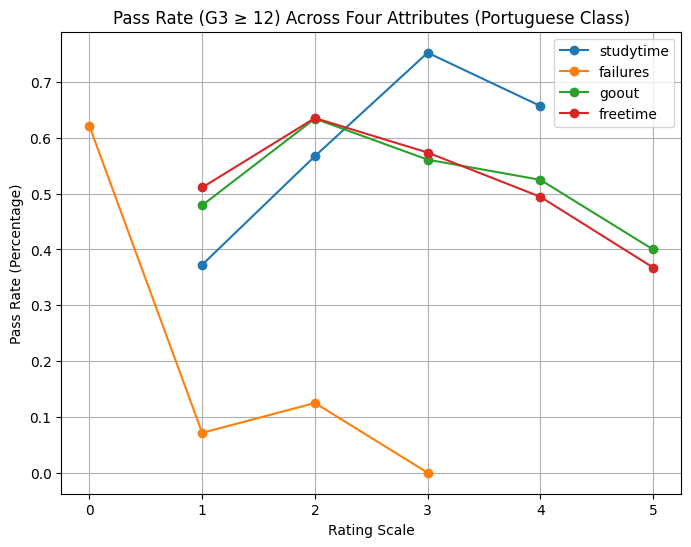

<Figure size 640x480 with 0 Axes>

In [98]:
# create a new column to see if the student passed the class
por_df["Passed"] = por_df["G3"] >= 12

plt.figure(figsize=(8,6))

# studytime pass rate
study_pass_p = por_df.groupby("studytime")["Passed"].mean()
plt.plot(study_pass_p.index, study_pass_p.values, marker="o", label="studytime")

# failures pass rate
fail_pass_p = por_df.groupby("failures")["Passed"].mean()
plt.plot(fail_pass_p.index, fail_pass_p.values, marker="o", label="failures")

# goout pass rate
goout_pass_p = por_df.groupby("goout")["Passed"].mean()
plt.plot(goout_pass_p.index, goout_pass_p.values, marker="o", label="goout")

# freetime pass rate
free_pass_p = por_df.groupby("freetime")["Passed"].mean()
plt.plot(free_pass_p.index, free_pass_p.values, marker="o", label="freetime")

plt.title("Pass Rate (G3 ≥ 12) Across Four Attributes (Portuguese Class)")
plt.xlabel("Rating Scale")
plt.ylabel("Pass Rate (Percentage)")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('pass_rate_port.png')

Using the same attributes and methods, we can see that students in the Portuguese class who also had a 2 for going out, and free time had an averege closer to 90% for passing compared to the 75% for the math class. The biggest takeway from these line plots is to show the passing percentage of students based on some of their attributes such as free time, going out, study time, and previous failures.

# 2: Data Mining Tasks

# 2.1: Decision Tree for student-mat.csv
# Using a decision tree model we will extract a rule related to the student's grade classification provided from the Math Class

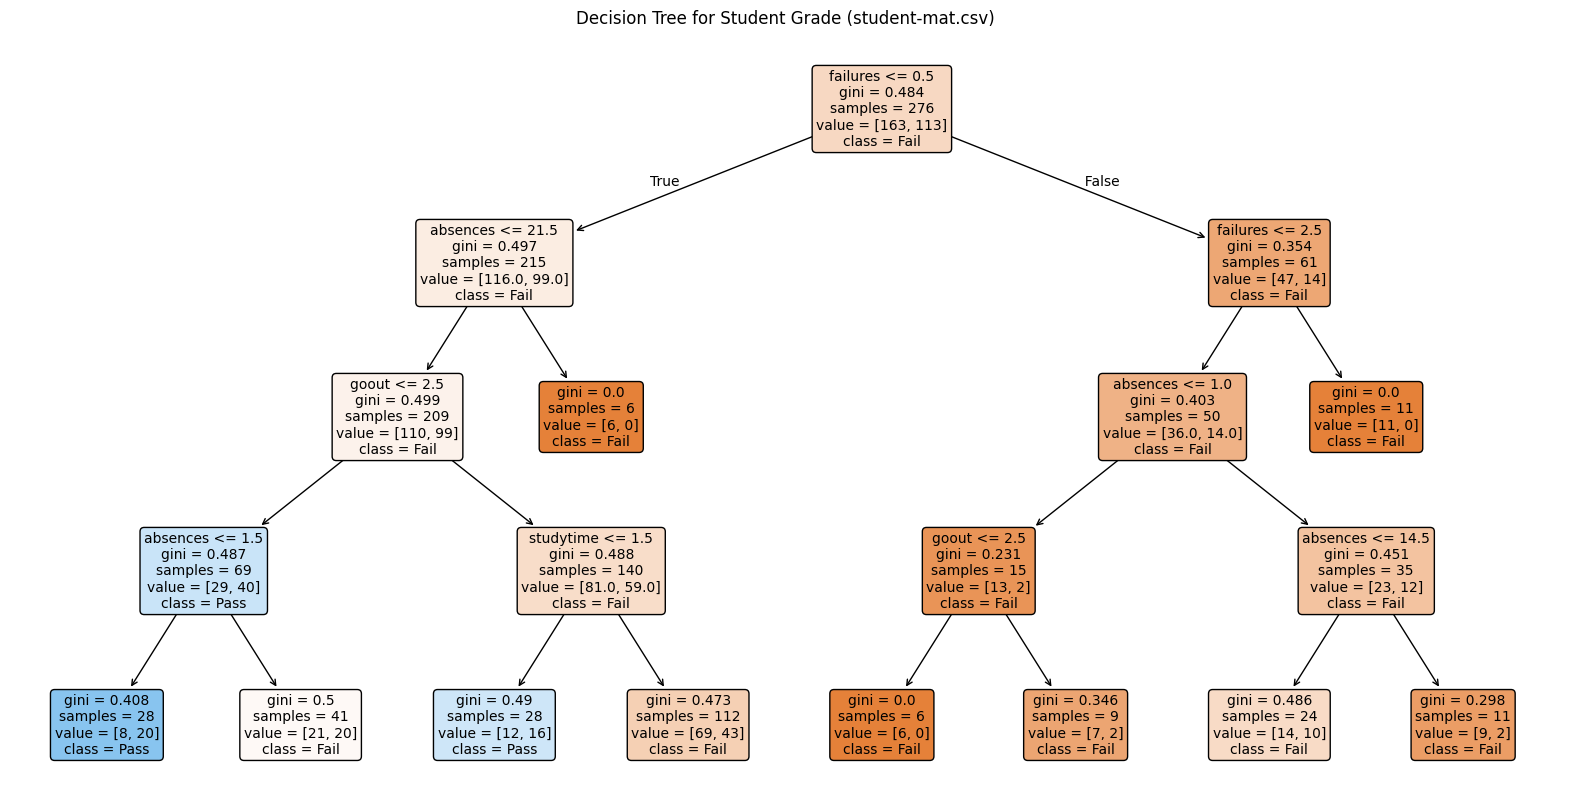

<Figure size 640x480 with 0 Axes>

In [99]:
mat_df["Pass"] = mat_df["G3"] >= 12

# get the selected features
feature_cols = ["studytime", "failures", "absences", "goout"]

X = mat_df[feature_cols]
y = mat_df["Pass"]

# use the label encoder
le = LabelEncoder()
y = le.fit_transform(y)

# train the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create the decision tree model
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

# show the tree
plt.figure(figsize=(20,10))
plot_tree(tree,feature_names=feature_cols,class_names=["Fail", "Pass"],filled=True,rounded=True,fontsize=10)
plt.title("Decision Tree for Student Grade (student-mat.csv)")
plt.show()
plt.savefig('decision_tree_math.png')

The purpose of this decision tree is to visualize and help classify whether a student will pass the math class based on the selected attributes based on their final grade (G3) being greater than or equal to 12. By only using a smaller portion of the dataset, it allows for a clearer path for the decision tree and makes it less complicated only going off of study time, past failures, absences, and going out. Also, by limiting the trees depth to 4, it makes the decision tree model easier to read and keep track of and seeing each step of the potential routes. The biggest takeaways from this decision tree model that past failures has the biggest impact on wheter a student will pass or fail the class with a 12 or higher. As we can see in the tree, students with multiple previous failures have a higher chance of failing the math class

# 2.2: Naive Bayes for student-por.csv

# Using Naive Bayes, create a target binary variable for students who passed (1 if G3 >= 12, otherwise 0). Using that binary target, we will show the class distribution for the Portuguese Class. 

In [85]:
por_df["Pass"] = (por_df["G3"] >= 12).astype(int)
class_distrubution = por_df['Pass'].value_counts(normalize=True) * 100
class_distrubution

Pass
1    53.620955
0    46.379045
Name: proportion, dtype: float64

In the above code, we can see the class distribution between students who passed and who did not (1 is pass, 0 is not). This is measured in percentages, so as we can see about 53% of students passed and 46% of students did not pass

In [109]:
# get the desired features and use the train_test_split
features = ['studytime', 'absences', 'G1']  
por_df["Pass"] = (por_df["G1"] >= 12).astype(int)

X = por_df[features]
y = por_df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

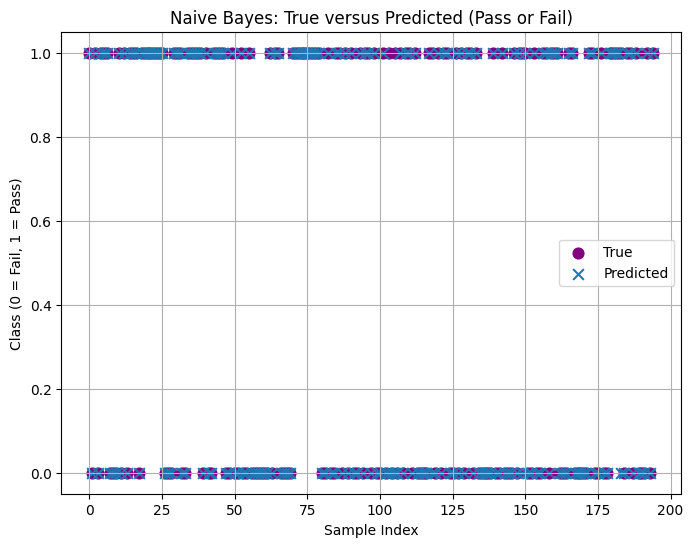

<Figure size 640x480 with 0 Axes>

In [110]:
# plot the scatter plot 
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, label="True", color = 'purple', s=60)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", s=60, marker="x")
plt.title("Naive Bayes: True versus Predicted (Pass or Fail)")
plt.xlabel("Sample Index")
plt.ylabel("Class (0 = Fail, 1 = Pass)")
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('scatter_plot_port.png')

In the above scatter plot, it compares the predicted model versus what actaully happened for each test sample. 0 = fail, 1 = pass, using this logic we can see the predicted values are x in blue and the actual or true values are in purple circles. 

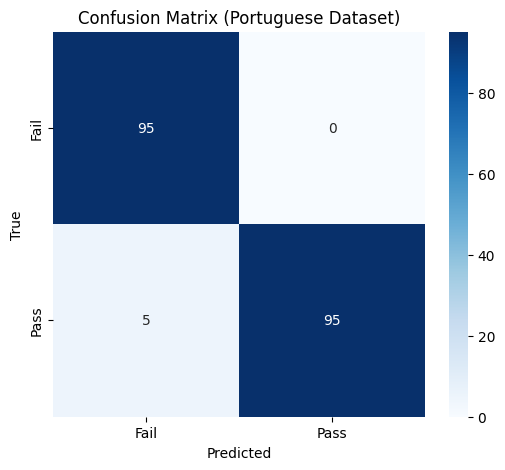

<Figure size 640x480 with 0 Axes>

In [108]:
X = por_df[["studytime", "absences", "G1"]]
y = (por_df["G1"] >= 12).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Portuguese Dataset)")
plt.show()
plt.savefig('Confusion_matrix_naive_bayes.png')

The above confusion matrix shows a numerical summary of performance, counting the true positives, true negatives, false positives, and false negatives to evaluate the accuracy and the different types of mistakes. 

C:\Users\footb\AppData\Local\Temp\ipykernel_10068\2997140494.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["schoolsup"] = le.fit_transform(X["schoolsup"])
C:\Users\footb\AppData\Local\Temp\ipykernel_10068\2997140494.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["famsup"] = le.fit_transform(X["famsup"])
C:\Users\footb\AppData\Local\Temp\ipykernel_10068\2997140494.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

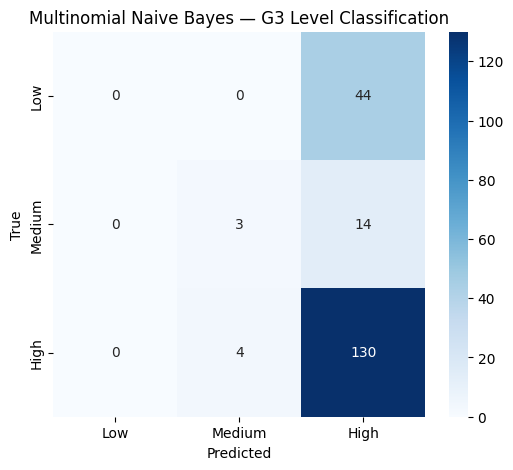

<Figure size 640x480 with 0 Axes>

In [112]:
# get the desired features 
features = ['studytime', 'failures', 'schoolsup', 'activities', 'famsup']

# get the three different grade possibilites
def grade_level(g3):
    if g3 <= 8:
        return "Low"
    elif g3 <= 14:
        return "Medium"
    else:
        return "High"
        
por_df["G3_Level"] = por_df["G3"].apply(grade_level)

X = por_df[["studytime", "failures", "schoolsup", "famsup", "activities"]]
y = por_df["G3_Level"]

# use the label endocer
le = LabelEncoder()
X["schoolsup"] = le.fit_transform(X["schoolsup"])
X["famsup"] = le.fit_transform(X["famsup"])
X["activities"] = le.fit_transform(X["activities"])

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Multinomial Naive Bayes — G3 Level Classification")
plt.show()
plt.savefig('Confusion_matrix_NB_G3.png')

This confusion matrix visualizes the three different grade categories being low, medium, and high. The Multinomial Naive Bayes gives a very easy way to display and predict the grades students that students would get and whether they will be low, medium, or high